In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
info = pd.read_csv(r"C:\Users\ashraf deen\OneDrive\Desktop\globalterrorismdb_0718dist.csv", encoding="latin1")
df = pd.DataFrame(info)
df.head()

C:\Users\ashraf deen\AppData\Local\Temp\ipykernel_22476\4132539481.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  info = pd.read_csv(r"C:\Users\ashraf deen\OneDrive\Desktop\globalterrorismdb_0718dist.csv", encoding="latin1")


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
def clean_info(df):
    df = df[["iyear", "country_txt", "attacktype1_txt", "weaptype1_txt", "nkill", "nwound", "region_txt"]]
    df.rename(columns={"iyear": "Year", "country_txt": "Country",
                       "attacktype1_txt": "Attack Type", "weaptype1_txt": "Weapon Type",
                       "nkill": "Killed", "nwound": "Wounded"}, inplace=True)
    df["Killed"] = df["Killed"].fillna(0)
    df["Wounded"] = df["Wounded"].fillna(0)
    return df

In [6]:
def plot_bar(info, a, b, title, xlabel, ylabel):
    info.plot(kind="bar", color="orange", figsize=(15, 6))
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.show()


In [7]:
df = clean_info(info)


C:\Users\ashraf deen\AppData\Local\Temp\ipykernel_22476\394393891.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"iyear": "Year", "country_txt": "Country",
C:\Users\ashraf deen\AppData\Local\Temp\ipykernel_22476\394393891.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Killed"] = df["Killed"].fillna(0)
C:\Users\ashraf deen\AppData\Local\Temp\ipykernel_22476\394393891.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

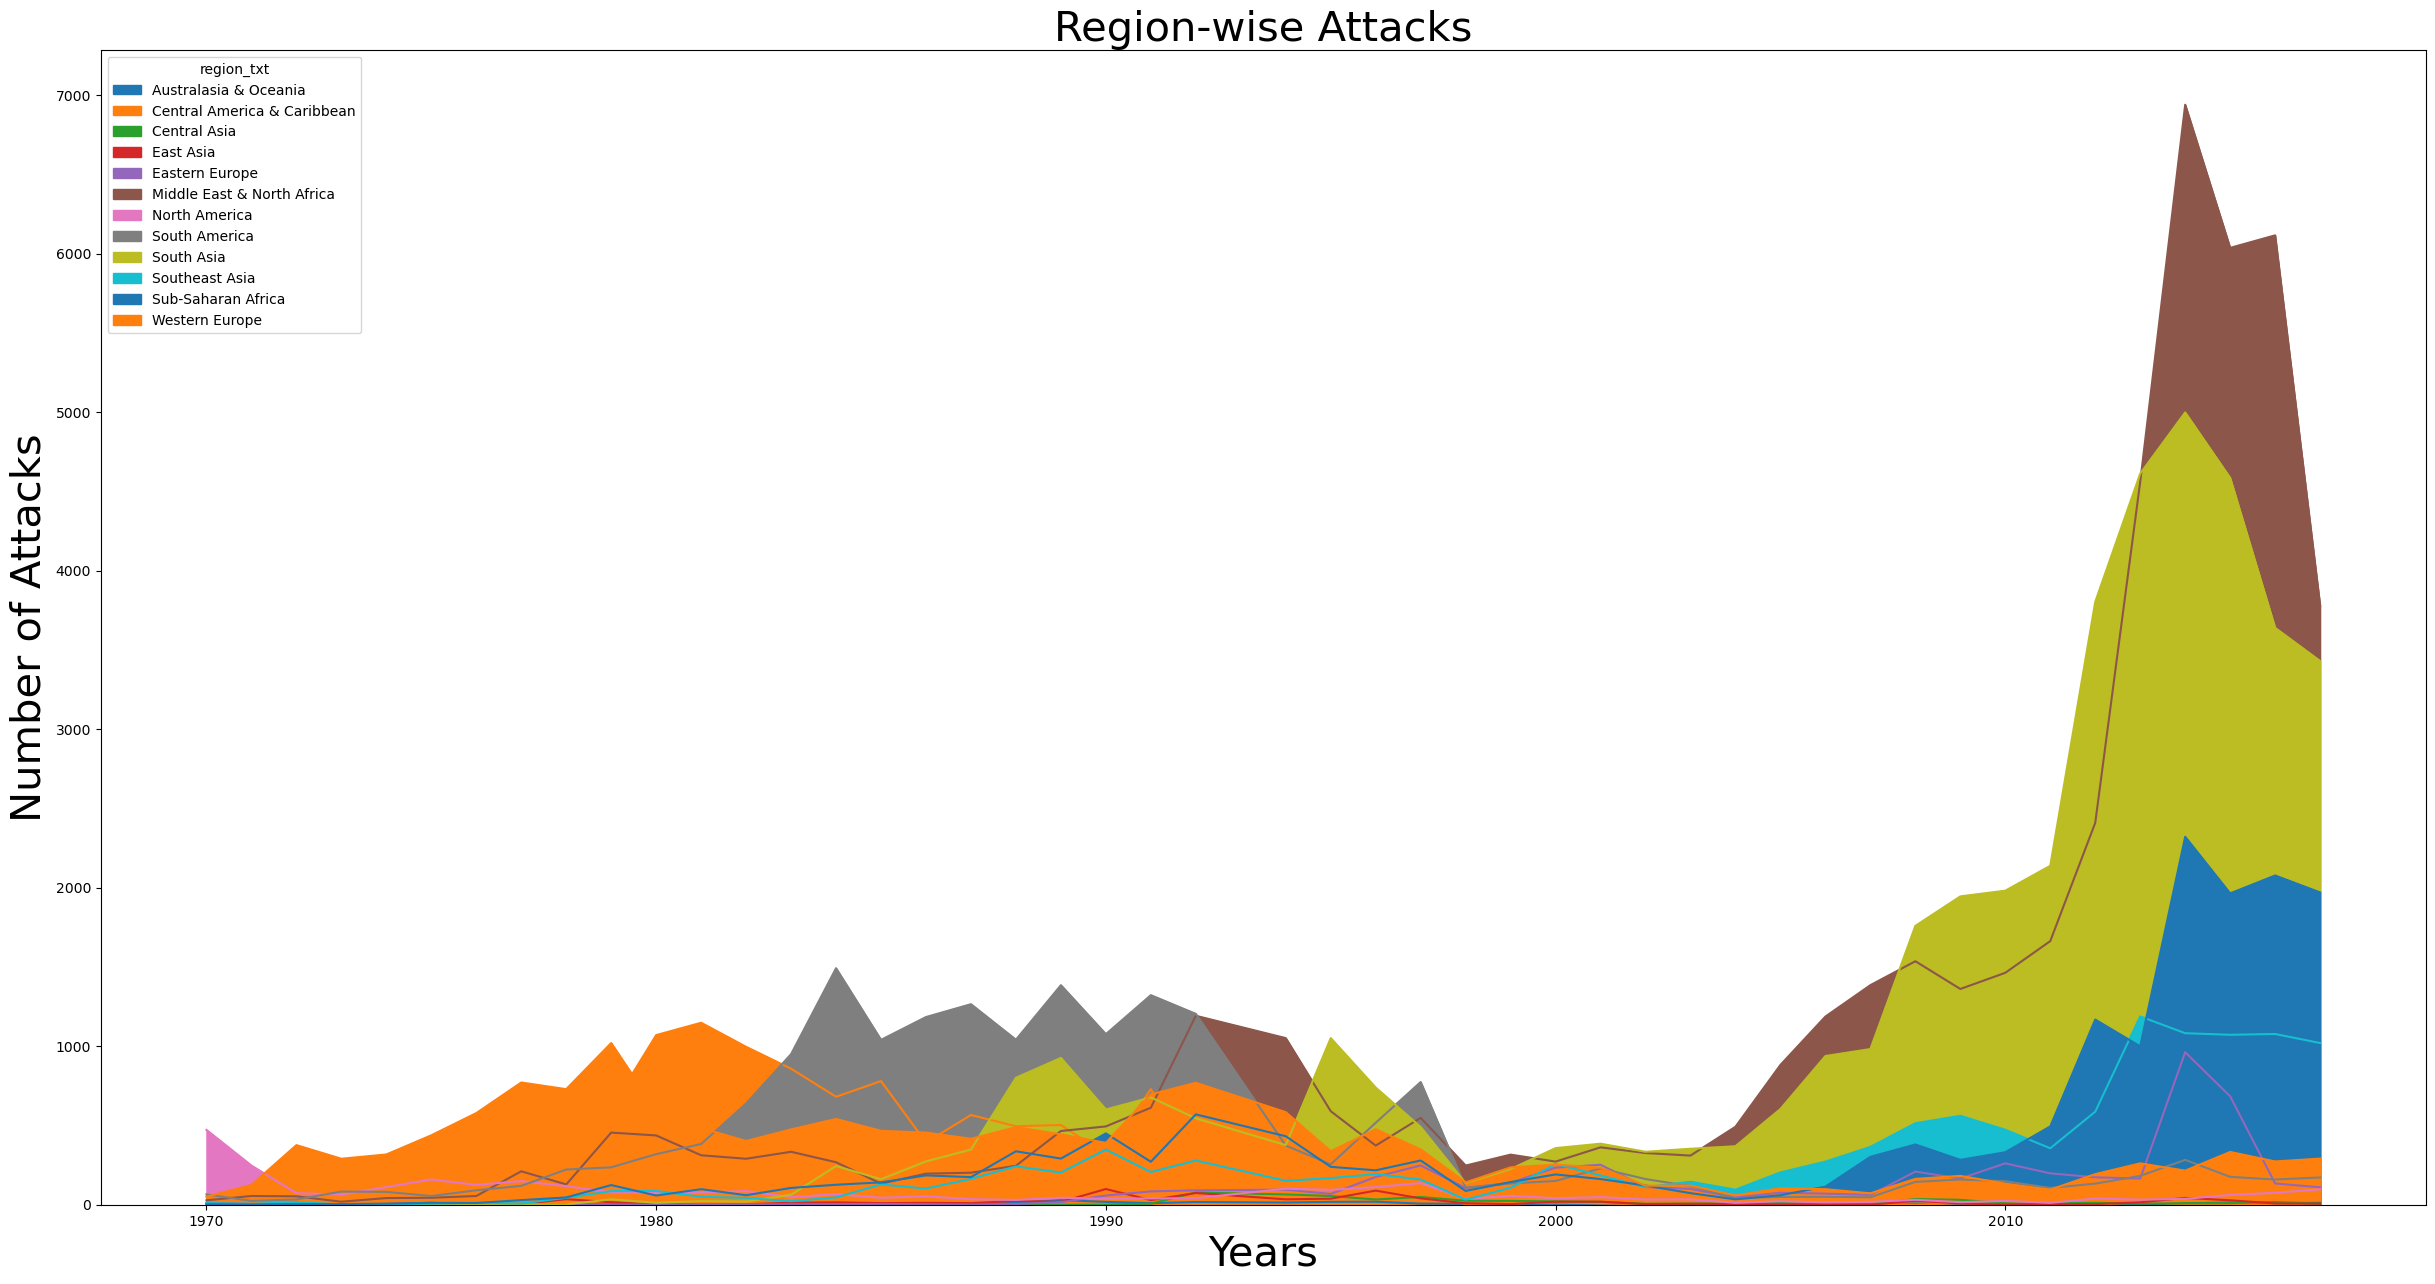

In [8]:
reg = pd.crosstab(df.Year, df.region_txt)
reg.plot(kind="area", stacked=False, alpha=1.0, figsize=(30, 15))
plt.title("Region-wise Attacks", fontsize=30)
plt.xlabel("Years", fontsize=30)
plt.ylabel("Number of Attacks", fontsize=30)
plt.show()

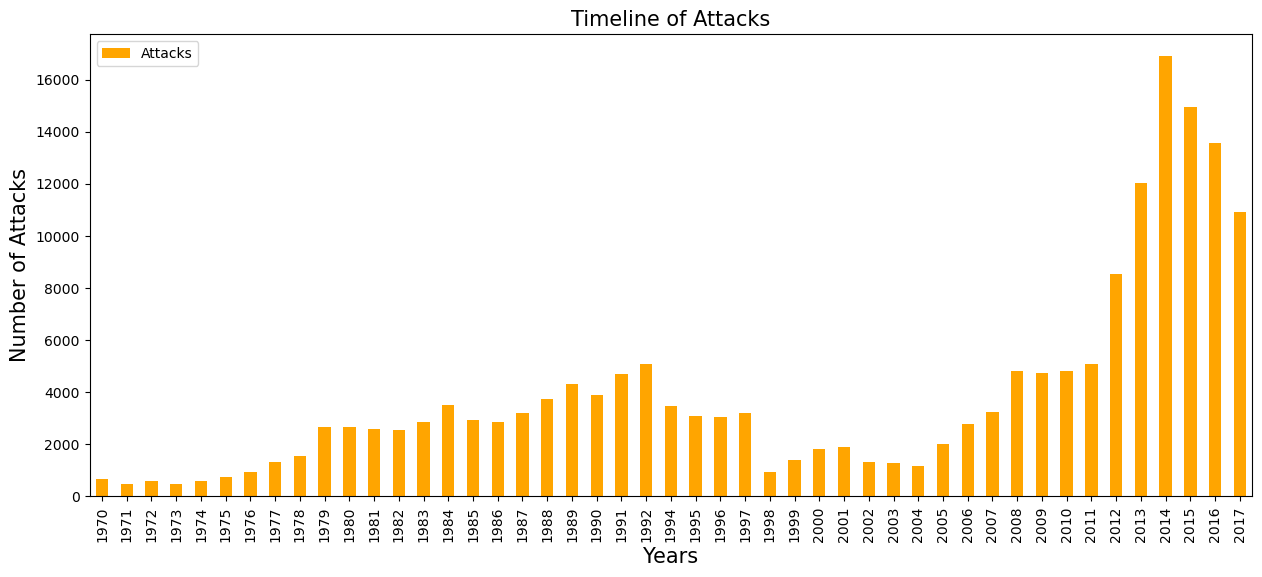

In [9]:
attacks = df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index": "Year", "Year": "Attacks"}).set_index("Year")
plot_bar(attacks, "Years", "Number of Attacks", "Timeline of Attacks", "Years", "Number of Attacks")

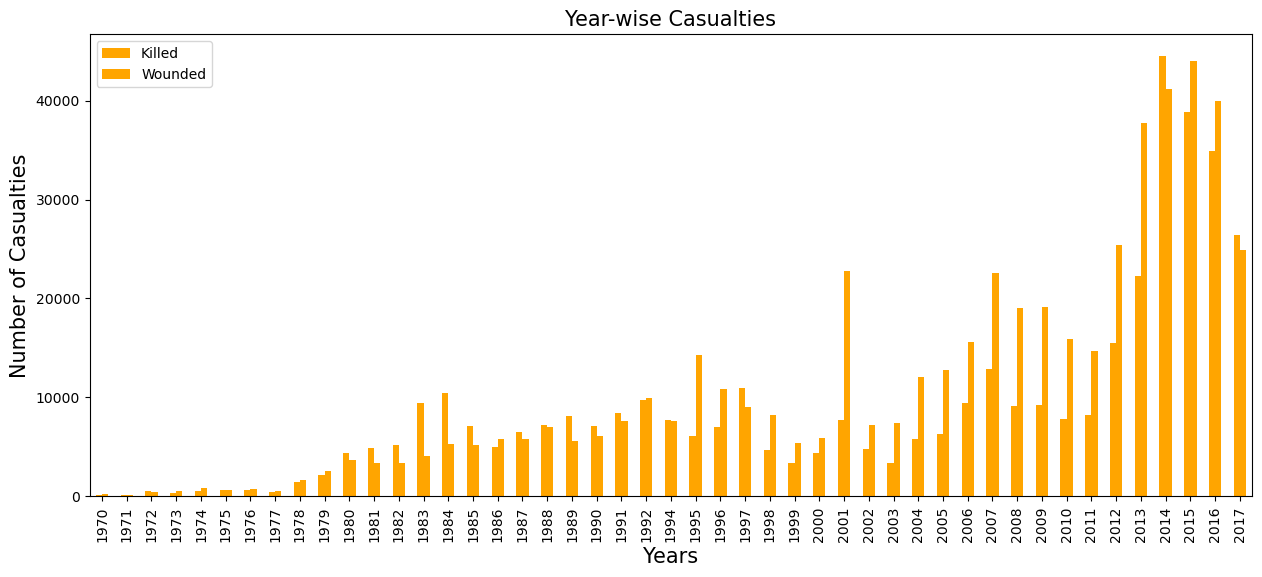

In [10]:
yc = df[["Year", "Killed", "Wounded"]].groupby("Year").sum()
plot_bar(yc, "Years", "Number of Casualties", "Year-wise Casualties", "Years", "Number of Casualties")

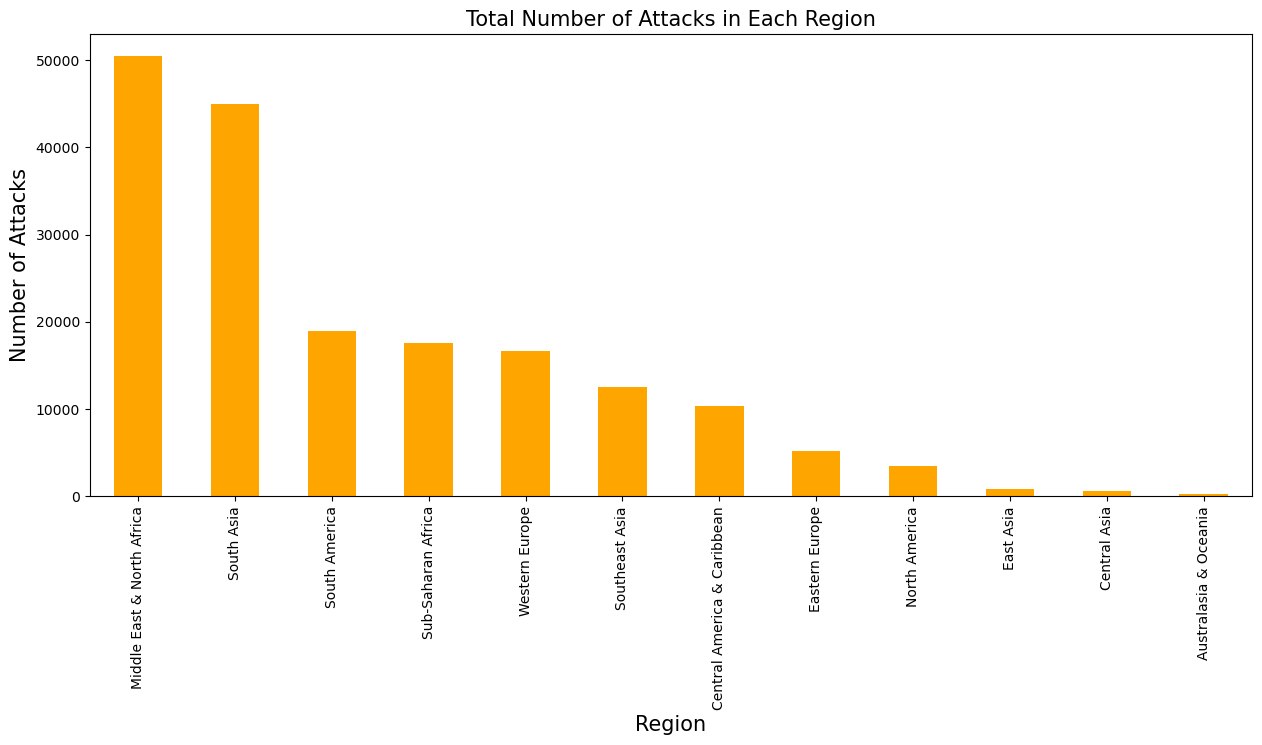

In [11]:
reg = reg.transpose()
reg["Total"] = reg.sum(axis=1)
ra = reg["Total"].sort_values(ascending=False)
plot_bar(ra, "Region", "Number of Attacks", "Total Number of Attacks in Each Region", "Region", "Number of Attacks")

In [12]:
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"Province/State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace=True)

C:\Users\ashraf deen\AppData\Local\Temp\ipykernel_22476\4014908610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",


In [13]:
df.head()

,Year,Country,Attack Type,Weapon Type,Killed,Wounded,Region
0,1970,Dominican Republic,Assassination,Unknown,1.0,0.0,Central America & Caribbean
1,1970,Mexico,Hostage Taking (Kidnapping),Unknown,0.0,0.0,North America
2,1970,Philippines,Assassination,Unknown,1.0,0.0,Southeast Asia
3,1970,Greece,Bombing/Explosion,Explosives,0.0,0.0,Western Europe
4,1970,Japan,Facility/Infrastructure Attack,Incendiary,0.0,0.0,East Asia


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Country      181691 non-null  object 
 2   Attack Type  181691 non-null  object 
 3   Weapon Type  181691 non-null  object 
 4   Killed       181691 non-null  float64
 5   Wounded      181691 non-null  float64
 6   Region       181691 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 9.7+ MB


In [15]:
df.describe()

,Year,Killed,Wounded
count,181691.000000,181691.000000,181691.000000
mean,2002.638997,2.266860,2.883296
std,13.259430,11.227057,34.309747
min,1970.000000,0.000000,0.000000
25%,1991.000000,0.000000,0.000000
50%,2009.000000,0.000000,0.000000
75%,2014.000000,2.000000,2.000000
max,2017.000000,1570.000000,8191.000000


In [16]:
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]

C:\Users\ashraf deen\AppData\Local\Temp\ipykernel_22476\2246405792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Killed"]=df["Killed"].fillna(0)
C:\Users\ashraf deen\AppData\Local\Temp\ipykernel_22476\2246405792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Wounded"]=df["Wounded"].fillna(0)
C:\Users\ashraf deen\AppData\Local\Temp\ipykernel_22476\2246405792.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [17]:
rc=df[["Region","Casualty"]].groupby("Region").sum().sort_values(by="Casualty",ascending=False)
rc

,Casualty
Region,
Middle East & North Africa,351950.0
South Asia,242679.0
Sub-Saharan Africa,131243.0
South America,45553.0
Southeast Asia,41896.0
Central America & Caribbean,37699.0
North America,26447.0
Western Europe,25026.0
Eastern Europe,19460.0


In [18]:
rk=df[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending=False)
rk

,Killed
Region,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


In [22]:
ct=df["Country"].value_counts().head(10)
ct

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

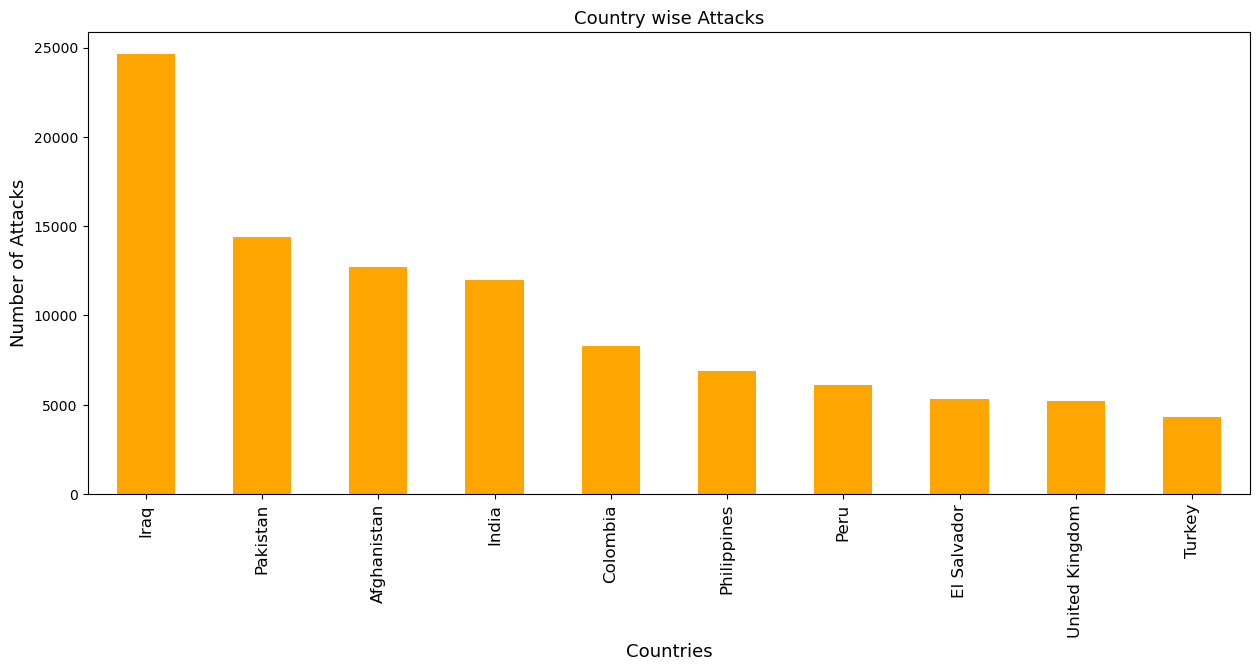

In [24]:
ct.plot(kind="bar",color="orange",figsize=(15,6))
plt.title("Country wise Attacks",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

C:\Users\ashraf deen\AppData\Local\Temp\ipykernel_22476\484343364.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


<Axes: >

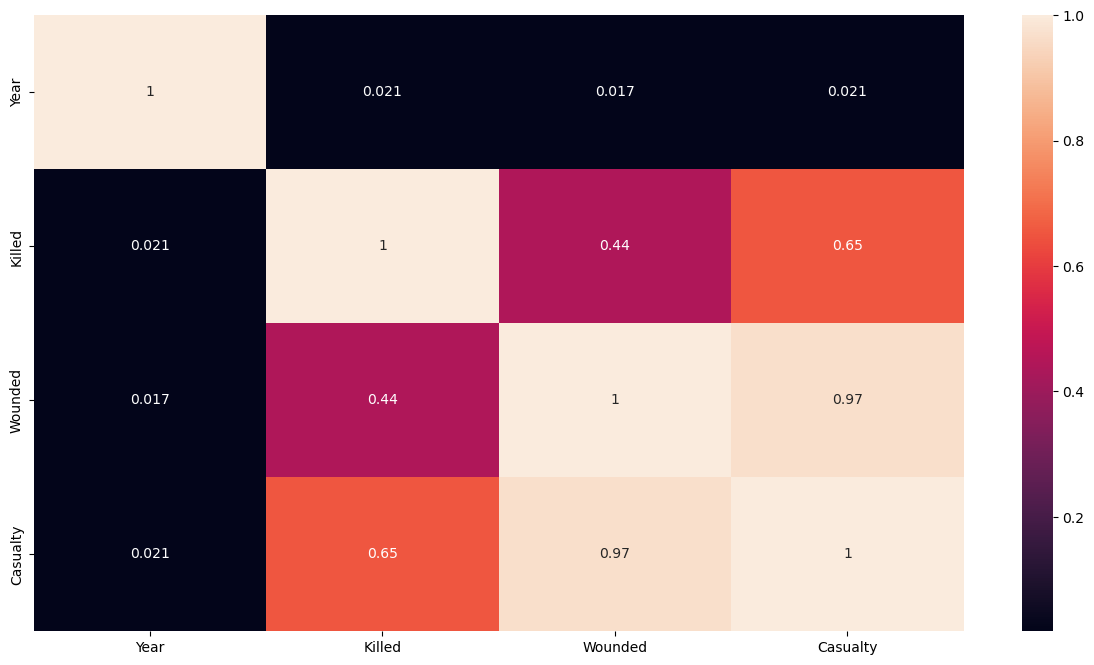

In [26]:
plt.figure(figsize = (15,8))
correlation=df.corr()
sns.heatmap(correlation,annot=True)

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64


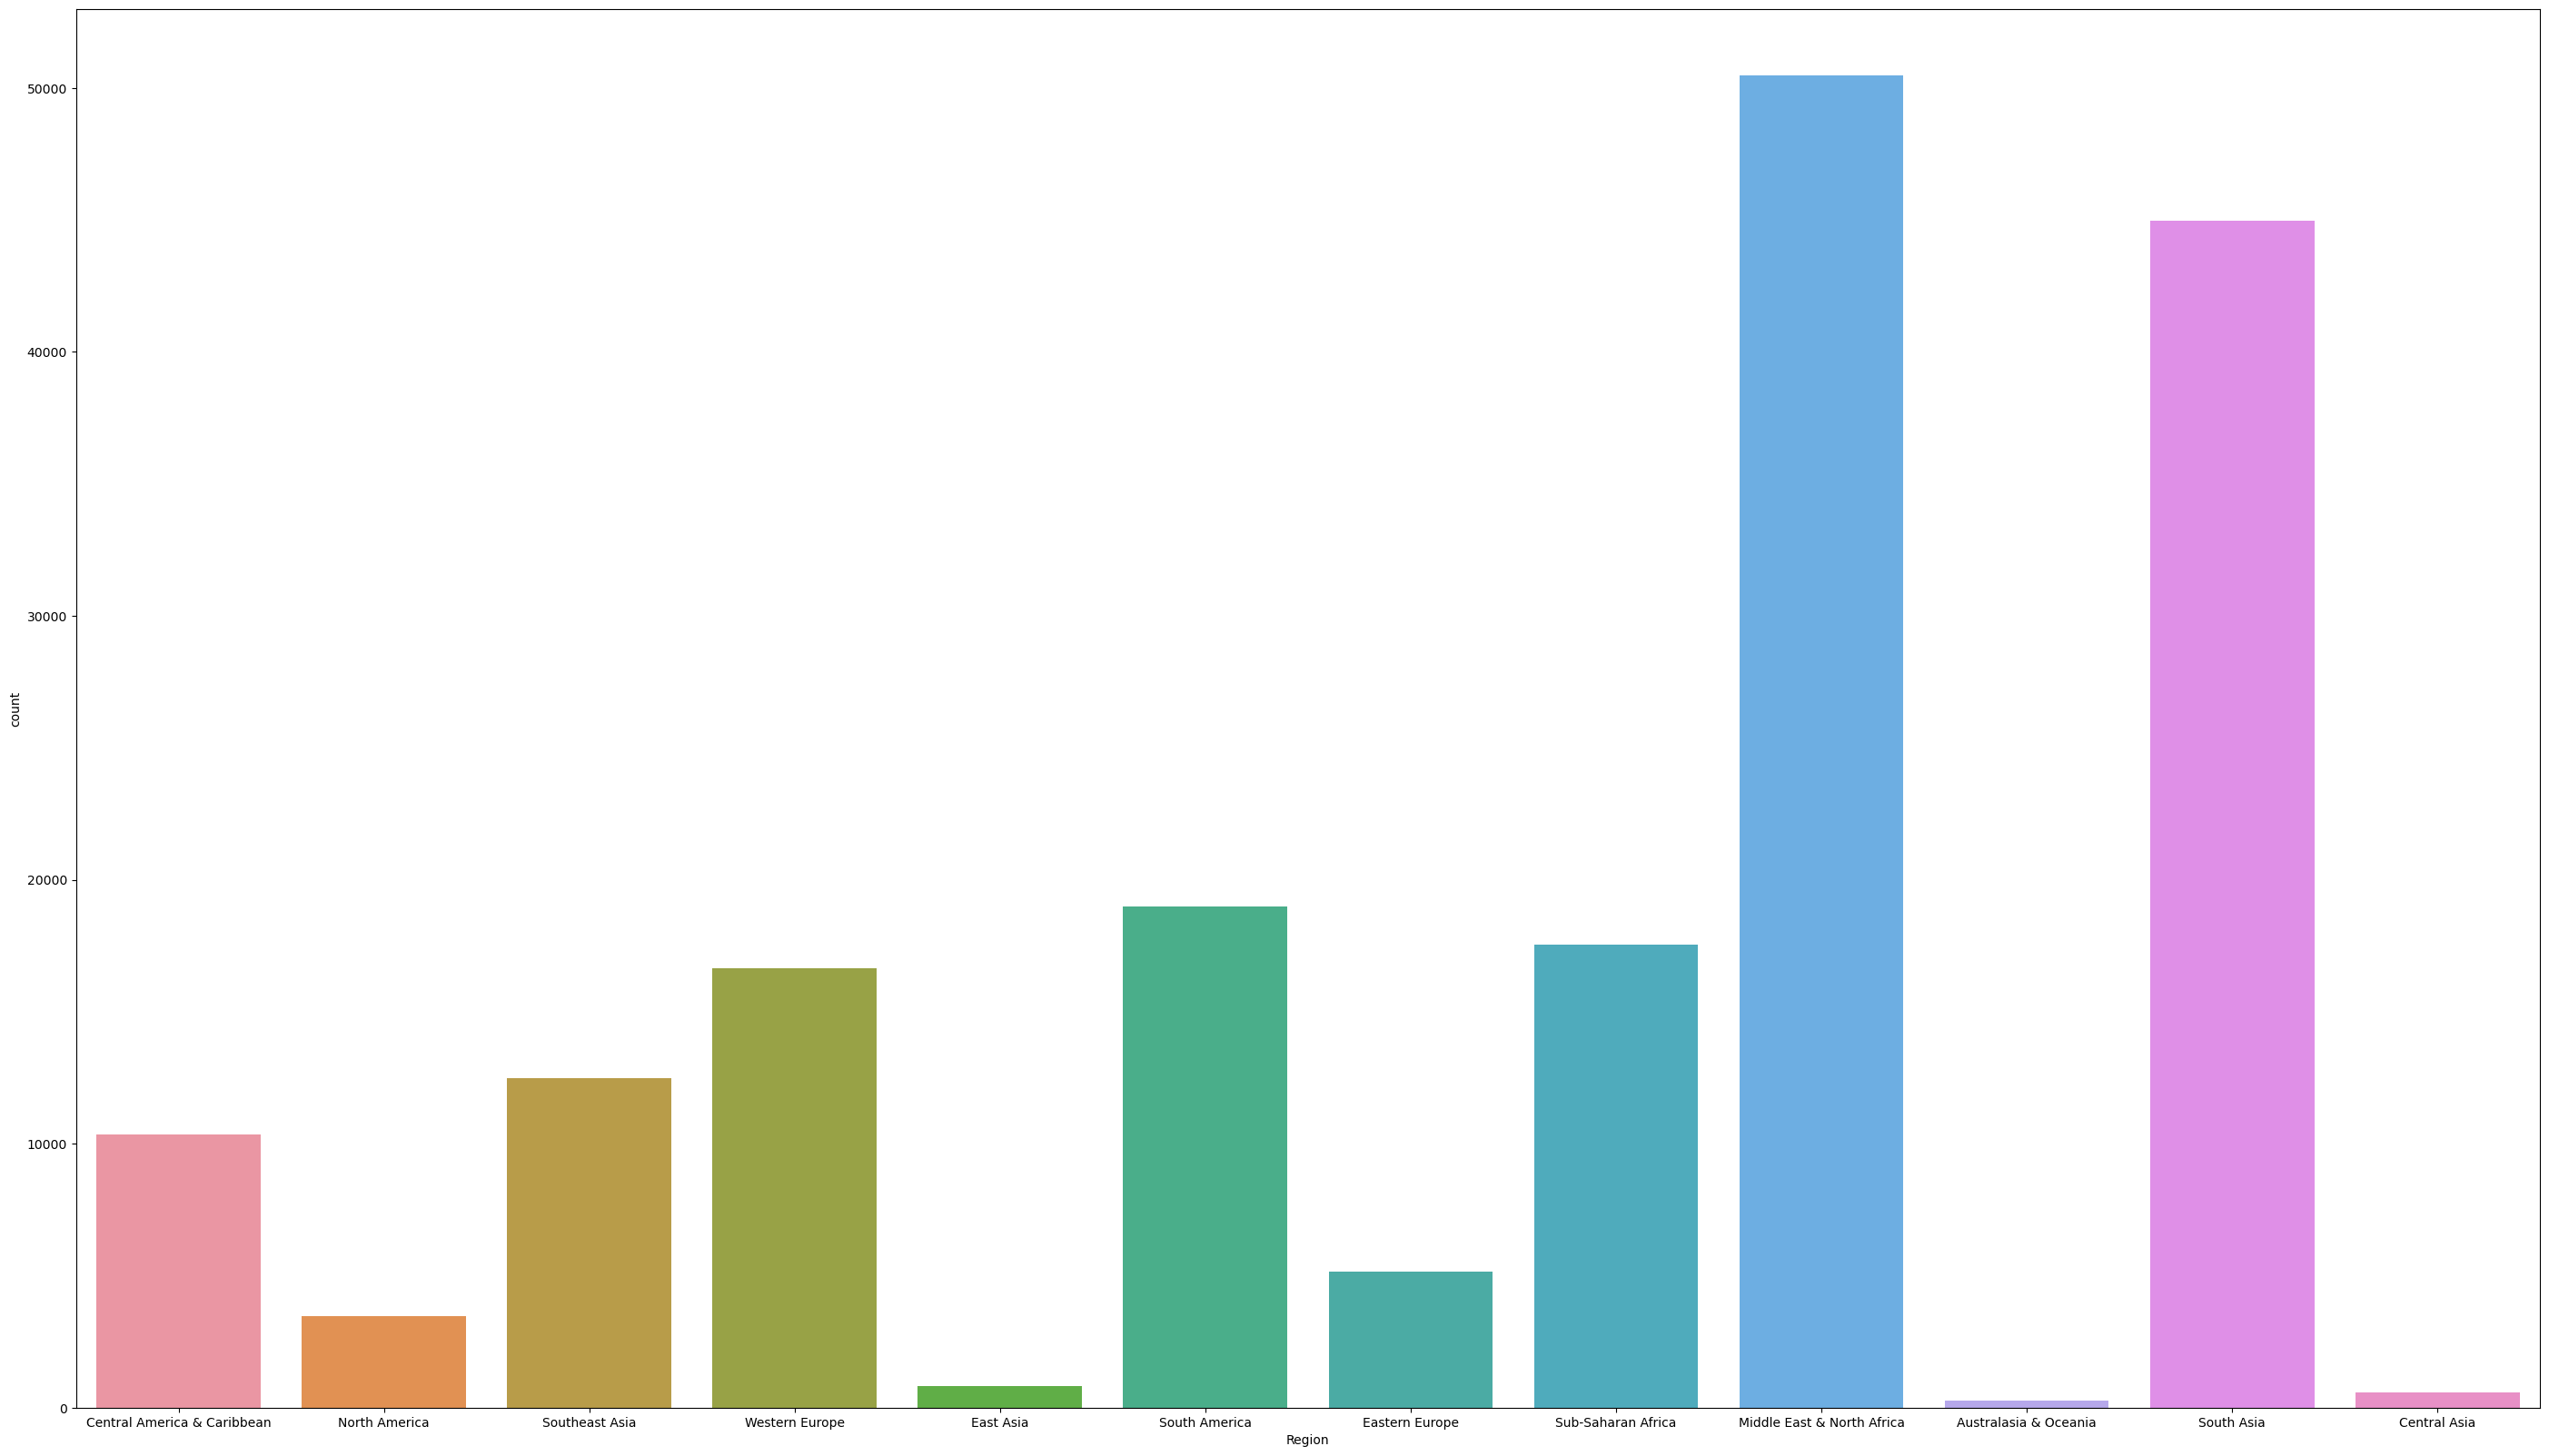

In [29]:
plt.figure(figsize=(35,20))
sns.countplot(x=df["Region"])
print(df["Region"].value_counts())

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: Country, Length: 205, dtype: int64


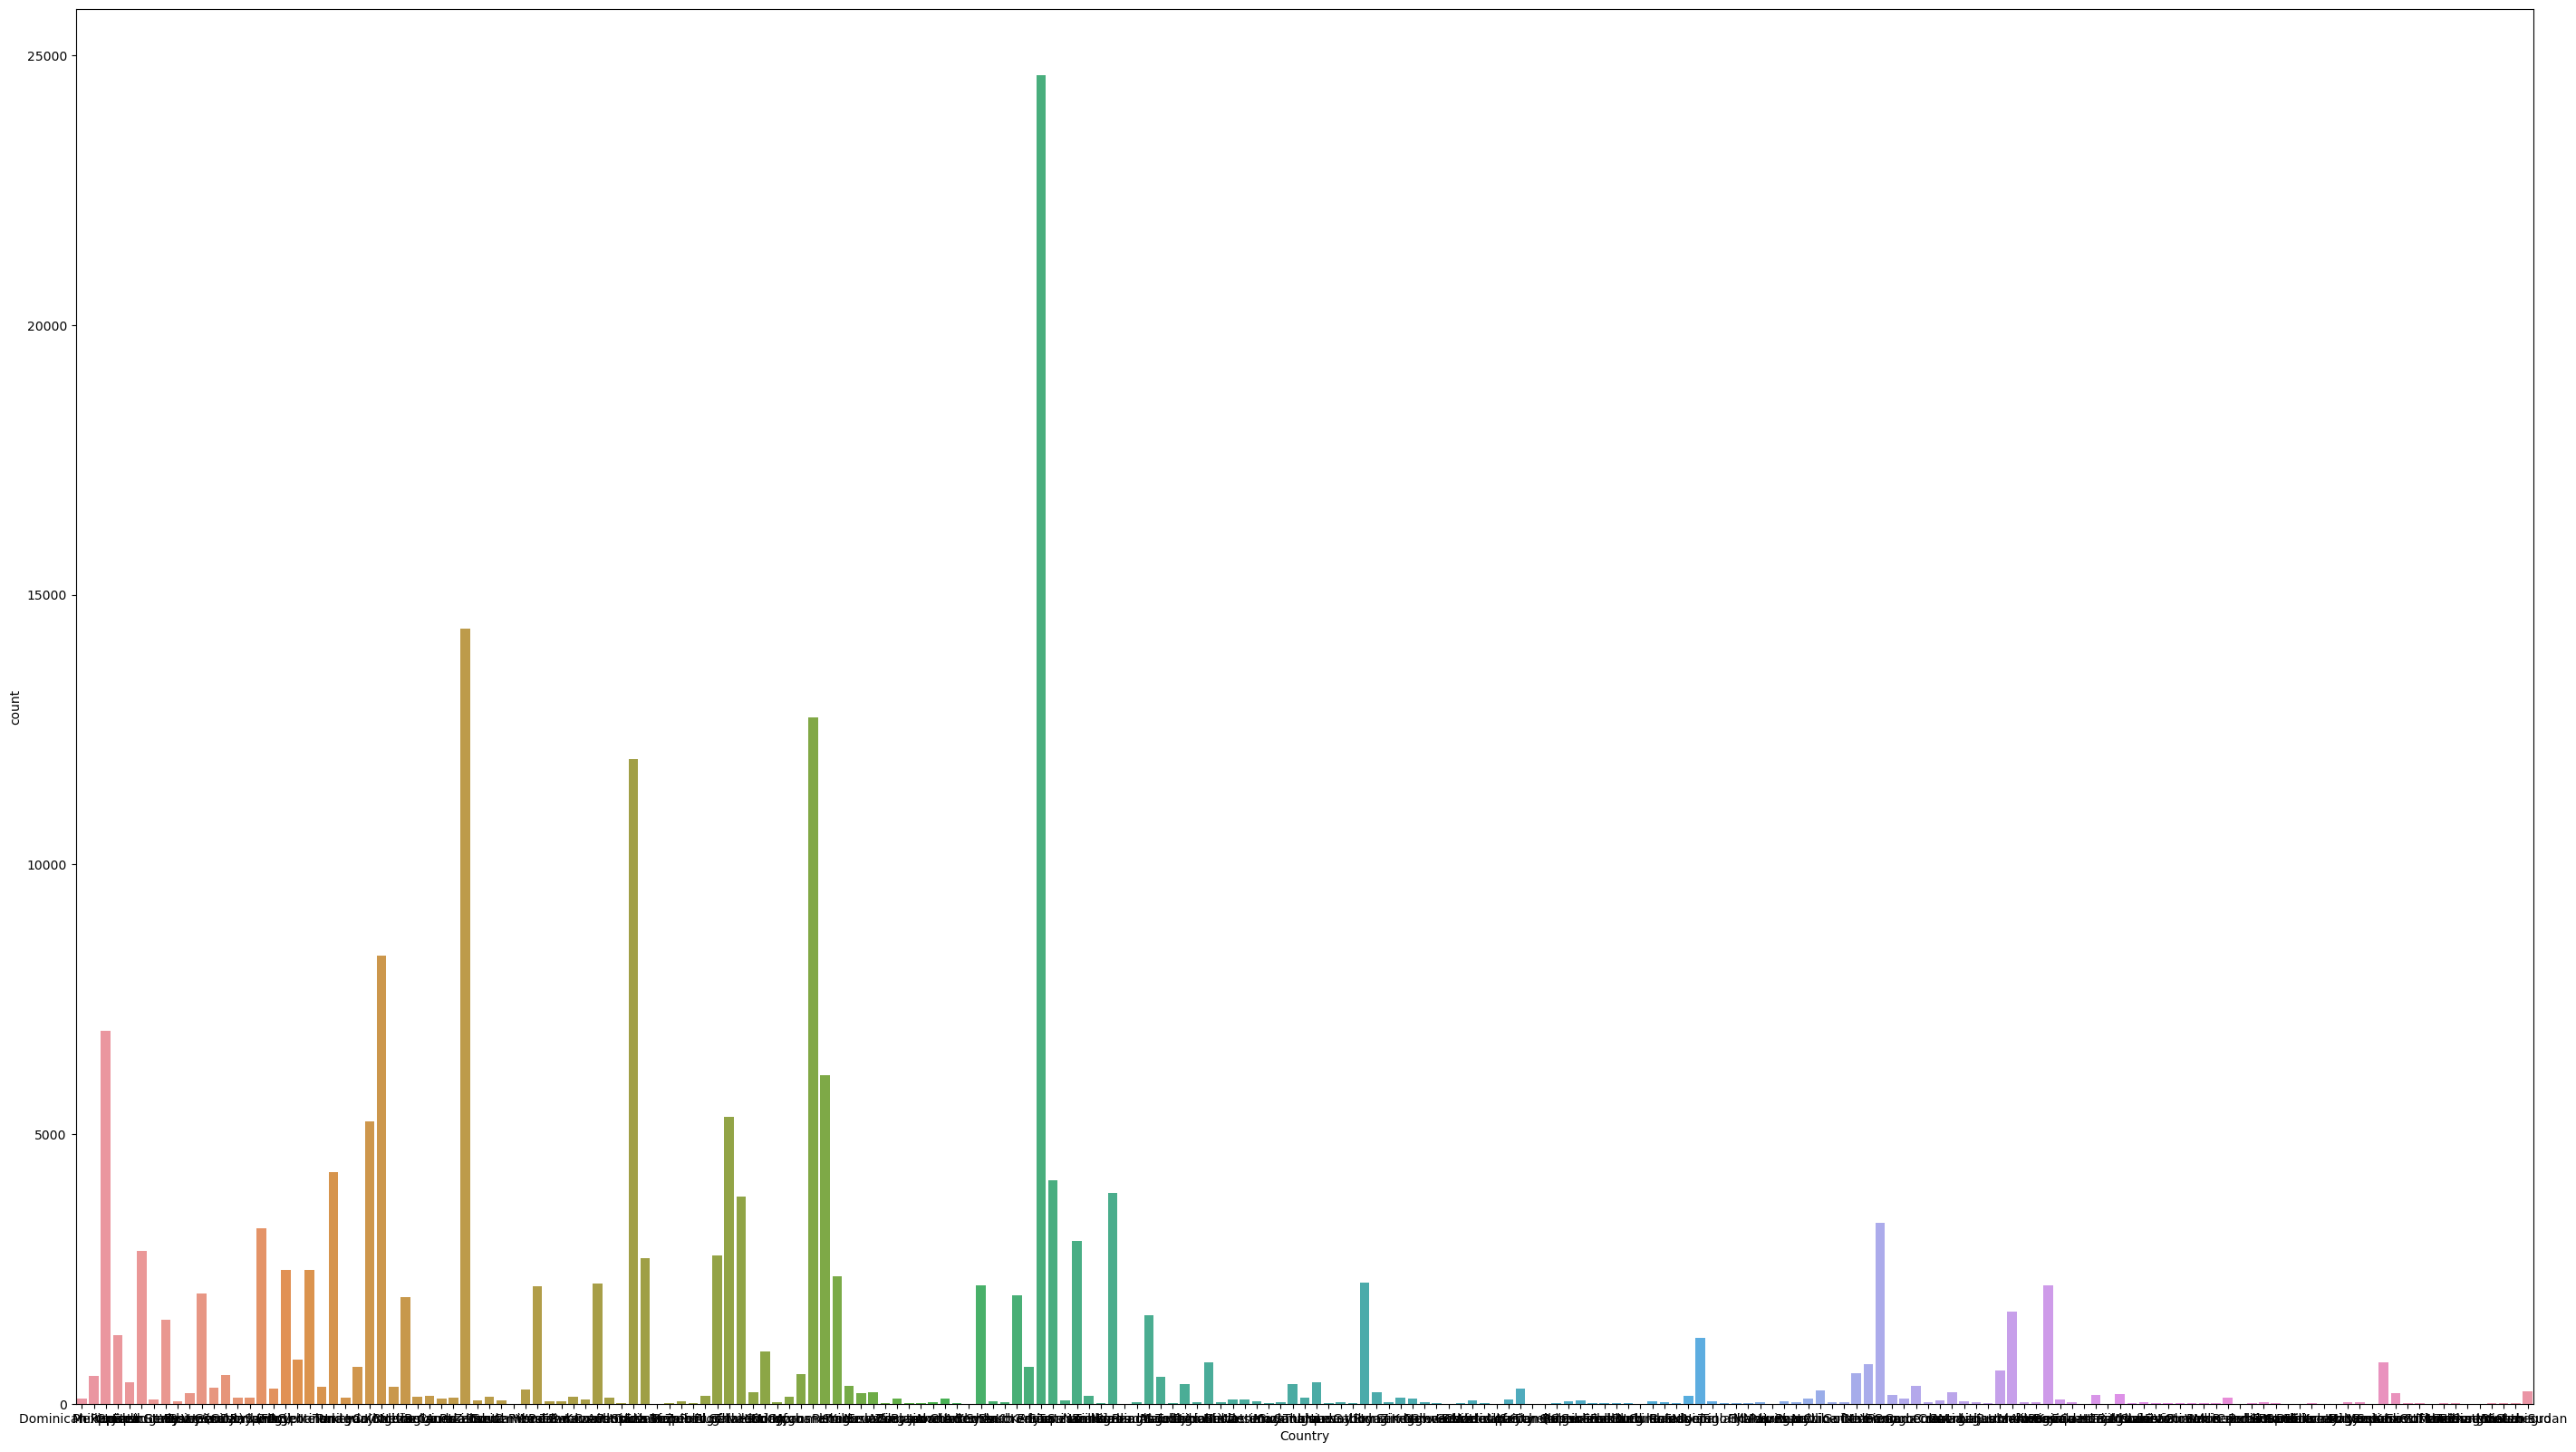

In [30]:
plt.figure(figsize=(35,20))

sns.countplot(x=df["Country"])

print(df["Country"].value_counts())

<Axes: ylabel='Country'>

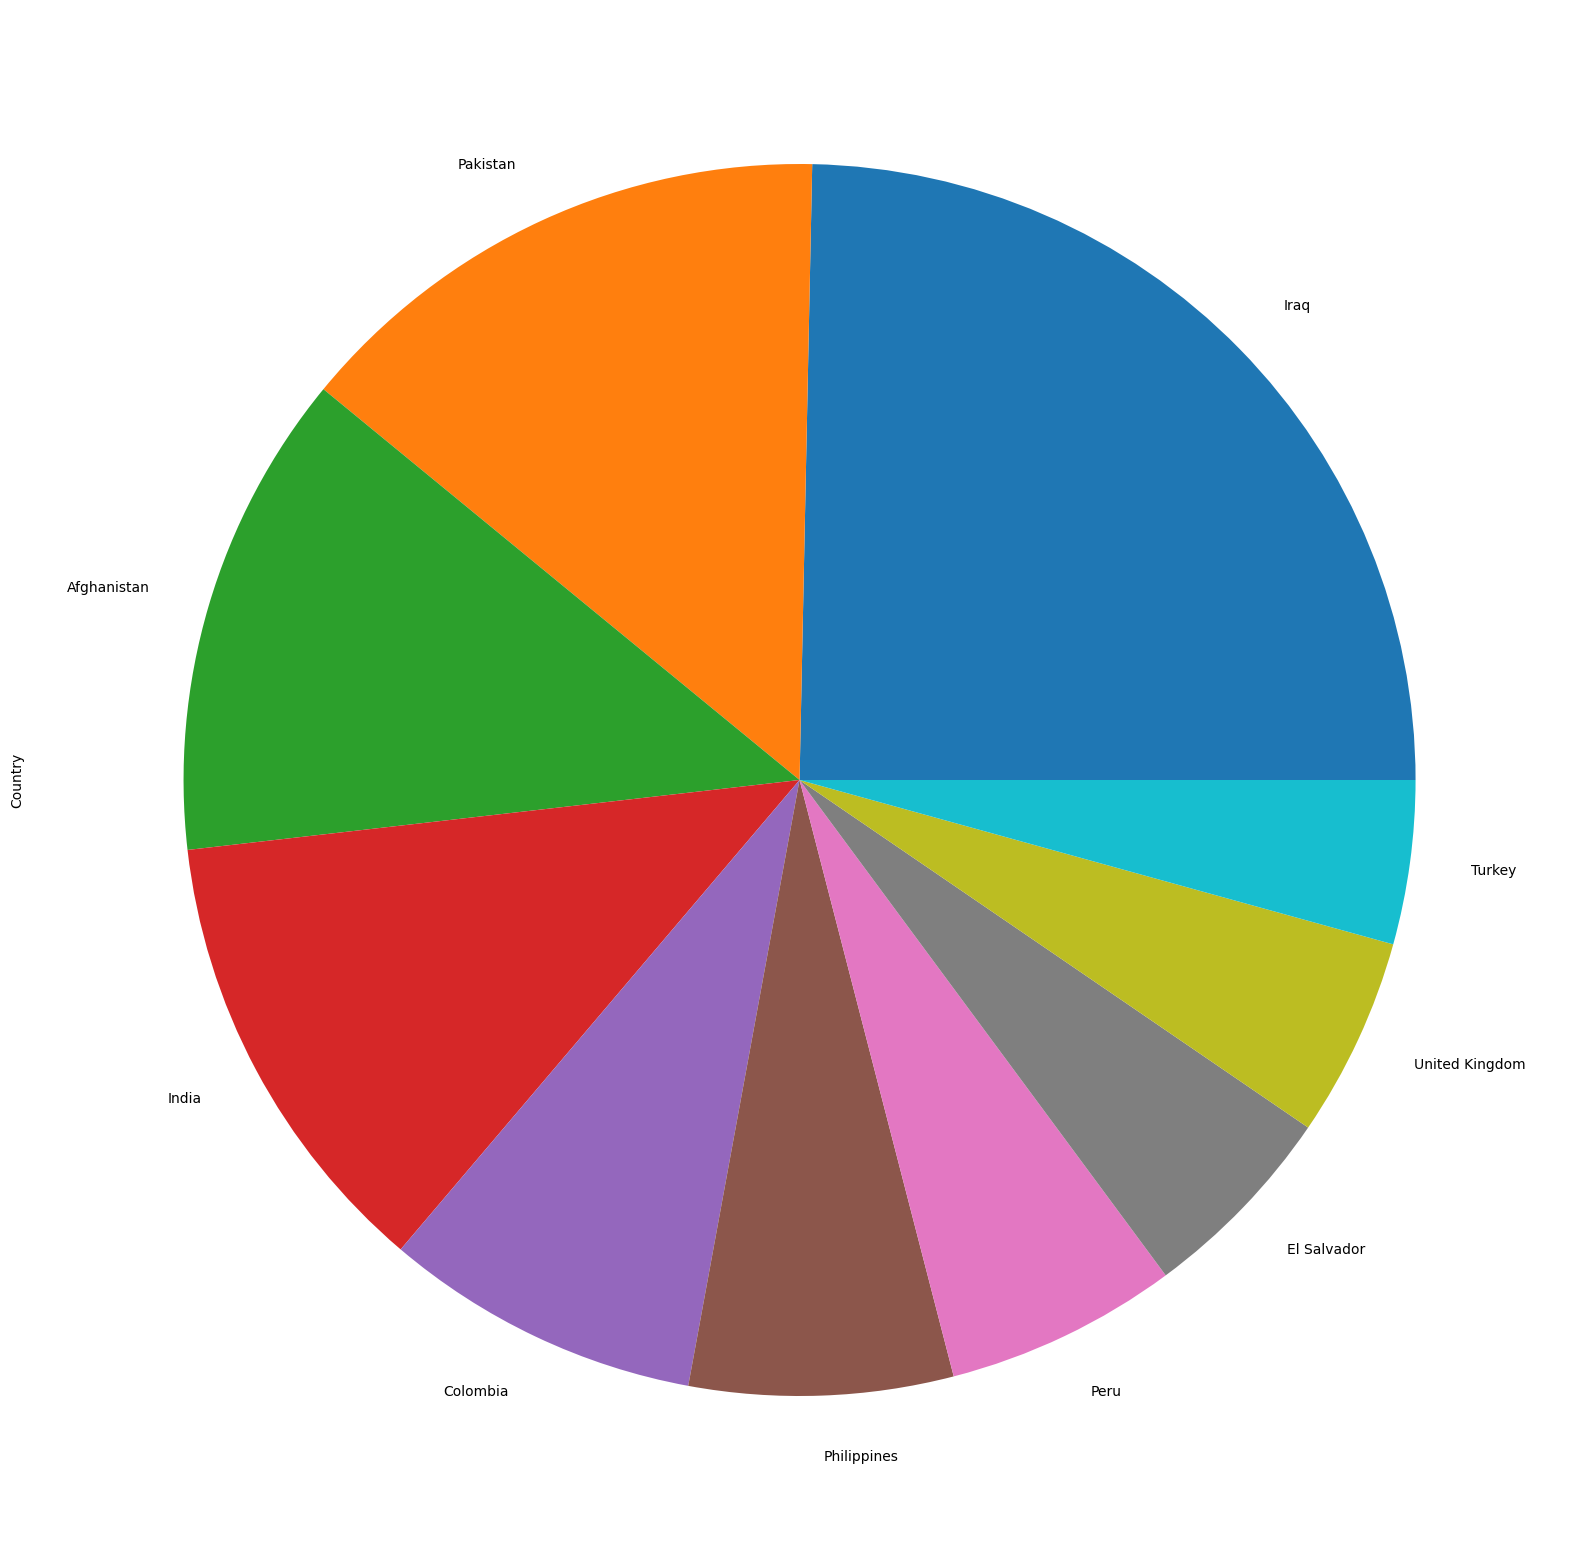

In [32]:
df["Country"].value_counts().head(10).plot.pie()